# Autoencoders

Alejandro Hermosillo <br>
Tom Arc <br>
Mauricio Flores <br>

In [1]:
import numpy as np
import pandas as pd

import keras
import tensorflow as tf
from keras import layers
from keras.callbacks import TensorBoard
tf.config.run_functions_eagerly(True)

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
emojis = np.loadtxt('/content/drive/Shareddrives/Redes neuronales/data/emojis.txt')
X = emojis[:, 1:]
y = emojis[:, 0]

In [4]:
X.shape

(2470, 1024)

## Dividir conjunto de datos 

Dividan aleatoriamente su conjunto de datos de tal manera que el 80% de los datos sean para entrenamiento y un 20% para prueba. Procuren que en la división las clases mantengan la misma proporción tanto en los datos de entrenamiento como en los de prueba respecto a las proporciones. 

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)

## AutoEncoder de una capa oculta

Autoencoder de una capa oculta para los datos de Emojis utilizando los datos de entrenamiento.

In [6]:
encoding_dim = 32

input_img = keras.Input(shape=(1024,))
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = layers.Dense(1024, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)

In [7]:
encoder = keras.Model(input_img, encoded)

In [8]:
encoded_input = keras.Input(shape=(encoding_dim))

decoder_layer = autoencoder.layers[-1](encoded_input)
decoder = keras.Model(encoded_input, decoder_layer)

In [9]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [10]:
autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


8/8 [==============================] - 1s 52ms/step - loss: 0.6775 - val_loss: 0.6399
Epoch 2/50
8/8 [==============================] - 0s 49ms/step - loss: 0.5909 - val_loss: 0.5219
Epoch 3/50
8/8 [==============================] - 0s 48ms/step - loss: 0.4916 - val_loss: 0.4597
Epoch 4/50
8/8 [==============================] - 0s 46ms/step - loss: 0.4493 - val_loss: 0.4298
Epoch 5/50
8/8 [==============================] - 0s 46ms/step - loss: 0.4258 - val_loss: 0.4163
Epoch 6/50
8/8 [==============================] - 0s 42ms/step - loss: 0.4128 - val_loss: 0.4058
Epoch 7/50
8/8 [==============================] - 0s 44ms/step - loss: 0.4020 - val_loss: 0.3964
Epoch 8/50
8/8 [==============================] - 0s 49ms/step - loss: 0.3922 - val_loss: 0.3874
Epoch 9/50
8/8 [==============================] - 0s 43ms/step - loss: 0.3833 - val_loss: 0.3801
Epoch 10/50
8/8 [==============================] - 0s 43ms/step - loss: 0.3763 - val_loss: 0.3740
Epoch 11/50
8/8 [=======================

In [11]:
encoded_imgs = encoder.predict(X_test)
decoded_imgs = decoder.predict(encoded_imgs)

16/16 [==============================] - 0s 2ms/step


## Resultados para el autoencoder de una capa

Utilicen algunas imágenes del conjunto de prueba para ver la salida de la capa intermedia y de la capa de decodificación

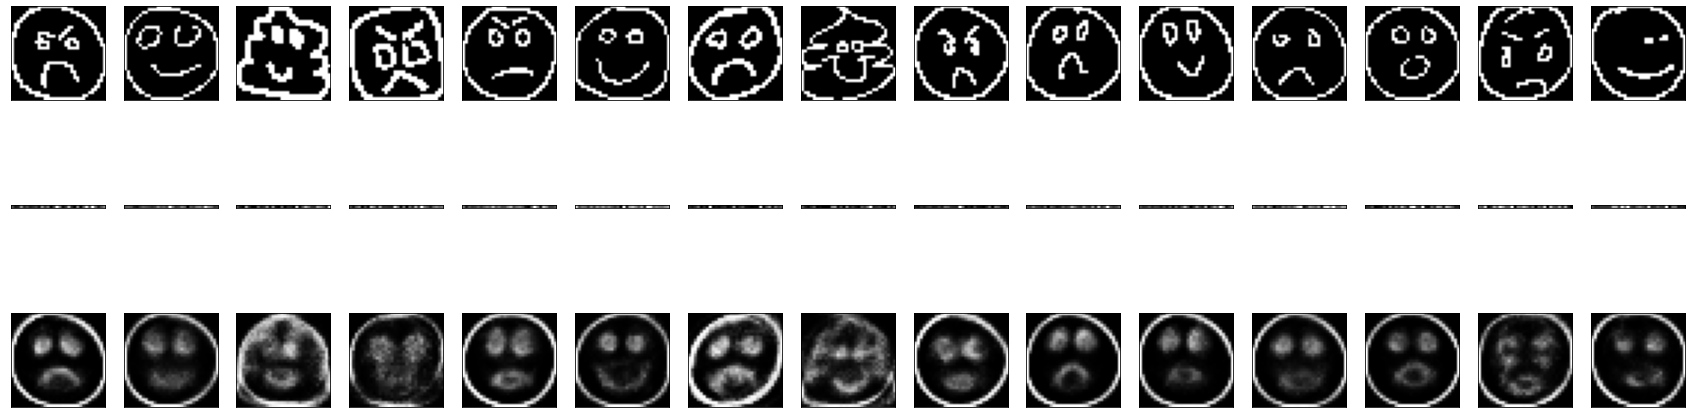

In [12]:
n = 15
appeared_emojis = []
plt.figure(figsize=(30, 8))
for i in range(n):

  # Display original
  ax = plt.subplot(3, n, i+1)
  plt.imshow(X_test[i].reshape(32, 32))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # Display encoded
  ax = plt.subplot(3, n, i+1+n)
  plt.imshow(encoded_imgs[i].reshape(1, 32))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # Display decoded
  ax = plt.subplot(3, n, i+1+2*n)
  plt.imshow(decoded_imgs[i].reshape(32, 32))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)


Evalúen el error cuadrático medio entre las imágenes de prueba y su correspodiente salida

In [25]:
mse = tf.keras.losses.MeanSquaredError()
print(f'El error cuadrático medio es: {mse(X_test, decoded_imgs).numpy()}')

El error cuadrático medio es: 0.08304096013307571


## Agregar factor de regularización a la capa intermedia

Agreguen un factor de regularización a la capa intermedia y repitan los anteriores pasos

In [26]:
from keras import regularizers

encoding_dim = 32

imput_img = keras.Input(shape=(1024, ))

encoded = layers.Dense(encoding_dim, activation='relu', activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = layers.Dense(1024, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)

In [27]:
encoder = keras.Model(input_img, encoded)

In [28]:
encoded_input = keras.Input(shape=(encoding_dim))

decoder_layer = autoencoder.layers[-1](encoded_input)
decoder = keras.Model(encoded_input, decoder_layer)

In [29]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [30]:
autoencoder.fit(X_train, X_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/100
3/8 [==========>...................] - ETA: 0s - loss: 0.6923

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


8/8 [==============================] - 0s 54ms/step - loss: 0.6821 - val_loss: 0.6498
Epoch 2/100
8/8 [==============================] - 0s 42ms/step - loss: 0.6045 - val_loss: 0.5391
Epoch 3/100
8/8 [==============================] - 0s 47ms/step - loss: 0.5102 - val_loss: 0.4762
Epoch 4/100
8/8 [==============================] - 0s 53ms/step - loss: 0.4647 - val_loss: 0.4439
Epoch 5/100
8/8 [==============================] - 0s 45ms/step - loss: 0.4392 - val_loss: 0.4295
Epoch 6/100
8/8 [==============================] - 0s 47ms/step - loss: 0.4272 - val_loss: 0.4201
Epoch 7/100
8/8 [==============================] - 0s 46ms/step - loss: 0.4177 - val_loss: 0.4119
Epoch 8/100
8/8 [==============================] - 0s 48ms/step - loss: 0.4088 - val_loss: 0.4031
Epoch 9/100
8/8 [==============================] - 0s 49ms/step - loss: 0.3992 - val_loss: 0.3934
Epoch 10/100
8/8 [==============================] - 0s 45ms/step - loss: 0.3895 - val_loss: 0.3846
Epoch 11/100
8/8 [=============

In [31]:
encoded_imgs = encoder.predict(X_test)
decoded_imgs = decoder.predict(encoded_imgs)

16/16 [==============================] - 0s 2ms/step


## Resultados con factor de regularización

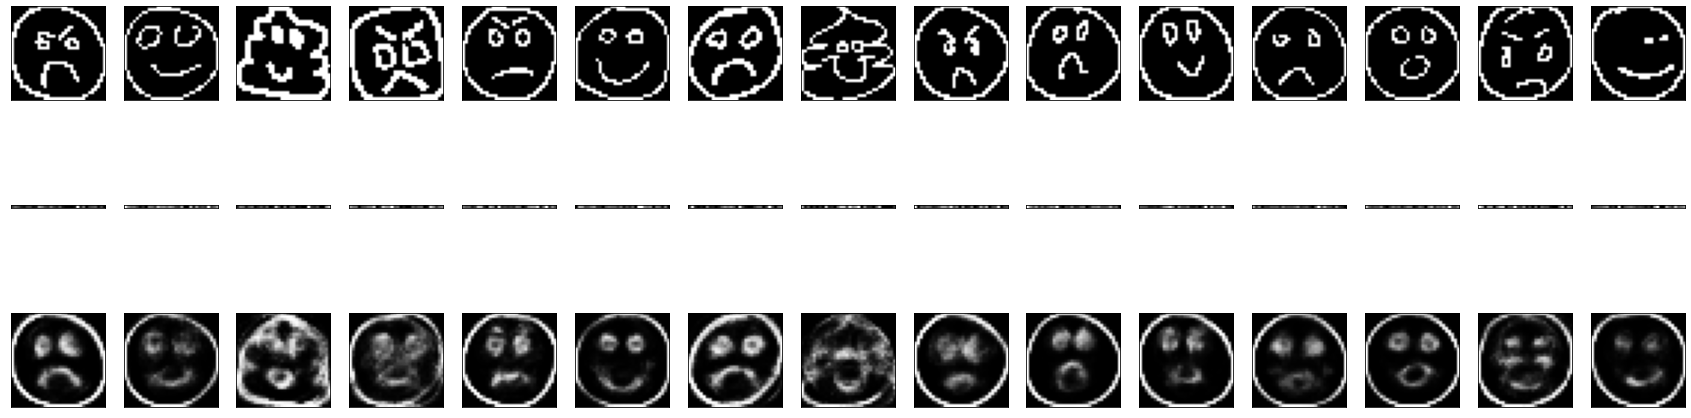

In [32]:
n = 15
appeared_emojis = []
plt.figure(figsize=(30, 8))
for i in range(n):

  # Display original
  ax = plt.subplot(3, n, i+1)
  plt.imshow(X_test[i].reshape(32, 32))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # Display encoded
  ax = plt.subplot(3, n, i+1+n)
  plt.imshow(encoded_imgs[i].reshape(1, 32))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # Display decoded
  ax = plt.subplot(3, n, i+1+2*n)
  plt.imshow(decoded_imgs[i].reshape(32, 32))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)


Evalúen el error cuadrático medio entre las imágenes de prueba y su correspodiente salida

In [33]:
mse = tf.keras.losses.MeanSquaredError()
print(f'El error cuadrático medio es: {mse(X_test, decoded_imgs).numpy()}')

El error cuadrático medio es: 0.07435388118028641


Como se puede observar, al agregar el factor de regularización el error cuadrático medio ha reducido aunque en un grado muy pequeño. De la misma forma, no se observan grandes cambios en las imágenes de los emojis. Se puede decir que hay ciertas mejoras para algunos tipos de emojis, pero en su mayoría son muy parecidas al modelo sin regularización. 

## Autoencoder profundo

Implemente un autoencoder profundo agregando más capas internas, y evalúen este nuevo modelo tal como se hizo en los dos modelos anteriores.

In [34]:
input_img = keras.Input(shape=(1024, ))
encoded = layers.Dense(512, activation='relu')(input_img)
encoded = layers.Dense(256, activation='relu')(encoded)
encoded = layers.Dense(128, activation='relu')(encoded)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(256, activation='relu')(decoded)
decoded = layers.Dense(512, activation='relu')(decoded)
decoded = layers.Dense(1024, activation='sigmoid')(decoded)

In [35]:
autoencoder = keras.Model(input_img, decoded)

In [36]:
encoder = keras.Model(input_img, encoded)
decoder = keras.Model(encoded, decoded)

In [37]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(X_train, X_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/100
8/8 [==============================] - 1s 122ms/step - loss: 0.6352 - val_loss: 0.5028
Epoch 2/100
8/8 [==============================] - 1s 123ms/step - loss: 0.4508 - val_loss: 0.4273
Epoch 3/100
8/8 [==============================] - 1s 113ms/step - loss: 0.4189 - val_loss: 0.4094
Epoch 4/100
8/8 [==============================] - 1s 124ms/step - loss: 0.4069 - val_loss: 0.4039
Epoch 5/100
8/8 [==============================] - 1s 120ms/step - loss: 0.4027 - val_loss: 0.4002
Epoch 6/100
8/8 [==============================] - 1s 123ms/step - loss: 0.3998 - val_loss: 0.3980
Epoch 7/100
8/8 [==============================] - 1s 112ms/step - loss: 0.3974 - val_loss: 0.3946
Epoch 8/100
8/8 [==============================] - 1s 122ms/step - loss: 0.3916 - val_loss: 0.3844
Epoch 9/100
8/8 [==============================] - 1s 124ms/step - loss: 0.3786 - val_loss: 0.3717
Epoch 10/100
8/8 [==============================] - 1s 122ms/step - loss: 0.3690 - val_loss: 0.3665
Epoch 11/

In [38]:
encoded_imgs = encoder.predict(X_test)
decoded_imgs = decoder.predict(encoded_imgs)

16/16 [==============================] - 0s 7ms/step


## Resultados Autoencoder profundo

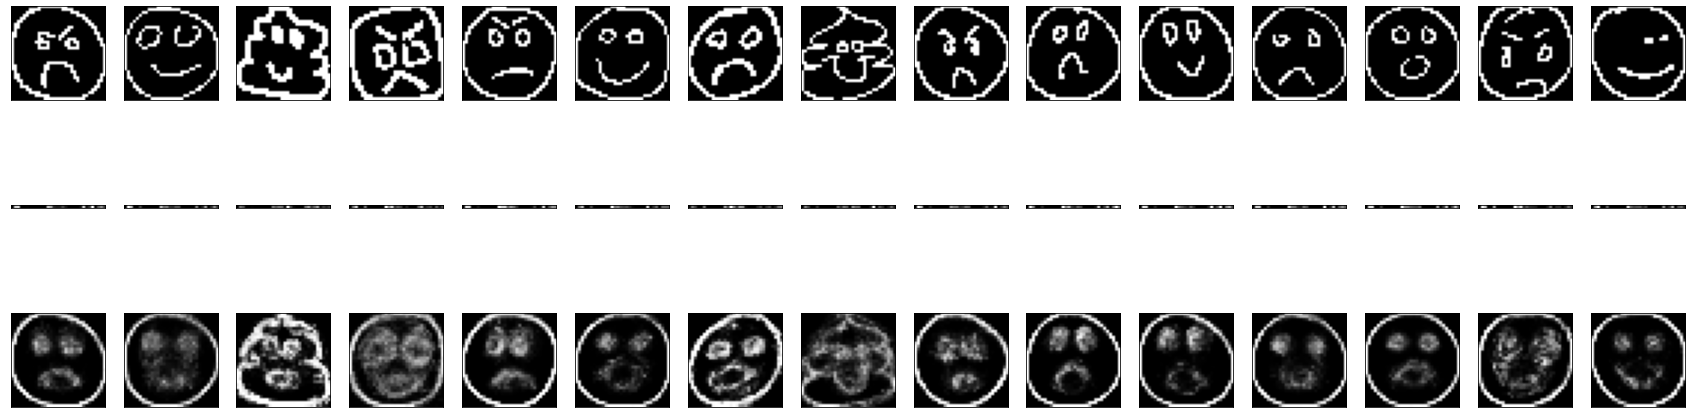

In [39]:
n = 15
appeared_emojis = []
plt.figure(figsize=(30, 8))
for i in range(n):

  # Display original
  ax = plt.subplot(3, n, i+1)
  plt.imshow(X_test[i].reshape(32, 32))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # Display encoded
  ax = plt.subplot(3, n, i+1+n)
  plt.imshow(encoded_imgs[i].reshape(1, 32))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # Display decoded
  ax = plt.subplot(3, n, i+1+2*n)
  plt.imshow(decoded_imgs[i].reshape(32, 32))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)


Evalúen el error cuadrático medio entre las imágenes de prueba y su correspodiente salida

In [41]:
mse = tf.keras.losses.MeanSquaredError()
print(f'El error cuadrático medio es: {mse(X_test, decoded_imgs).numpy()}')

El error cuadrático medio es: 0.08987625688314438


El error cuadrático sigue siendo muy parecido al de los casos anteriores, sin embargo, visualmente hubo una mejora para los emojis de caquita, ya que para este caso, las líneas son más fáciles de distinguir ya que para los anterieres había casos que ni siquiera era fácil distinguir una figura. Se observa que en este caso las imágenes son más nítidas, sin embargo, existen todavía errores al hacer que emojis felices y tristes parezcan el mismo después en la salida.

## Agregando ruido binario

Agreguen ruido binario a algunas imágenes de prueba (es decir, prendan algunos pixeles de manera aleatoria), y verifiquen la salida del autoencoder profundo.

In [44]:
X_train_tmp = np.reshape(X_train, (len(X_train), 32, 32, 1))
X_test_tmp = np.reshape(X_test, (len(X_test), 32, 32, 1))

noise_factor = 0.5
X_train_noisy = X_train_tmp + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train_tmp.shape)
X_test_noisy = X_test_tmp + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test_tmp.shape)

X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

Como lucen los datos ruidosos:

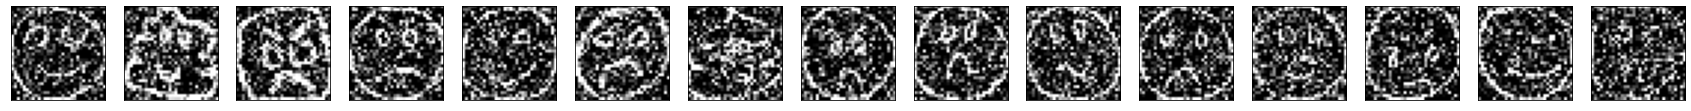

In [45]:
n = 15
plt.figure(figsize=(30, 8))
for i in range(1, n+1):
  ax = plt.subplot(1, n, i)
  plt.imshow(X_test_noisy[i].reshape(32, 32))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

Creacion del modelo

In [46]:
input_img = keras.Input(shape=(32, 32, 1))

x = layers.Conv2D(24, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(24, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [47]:
encoder = keras.Model(input_img, encoded)
decoder = keras.Model(encoded, decoded)

In [48]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [49]:
autoencoder.fit(X_train_noisy, X_train_tmp,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(X_test_noisy, X_test_tmp),
                callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)])

Epoch 1/100
16/16 [==============================] - 7s 420ms/step - loss: 0.5954 - val_loss: 0.5246
Epoch 2/100
16/16 [==============================] - 7s 419ms/step - loss: 0.5140 - val_loss: 0.5058
Epoch 3/100
16/16 [==============================] - 7s 415ms/step - loss: 0.5051 - val_loss: 0.4982
Epoch 4/100
16/16 [==============================] - 6s 403ms/step - loss: 0.4955 - val_loss: 0.4861
Epoch 5/100
16/16 [==============================] - 7s 416ms/step - loss: 0.4786 - val_loss: 0.4640
Epoch 6/100
16/16 [==============================] - 6s 399ms/step - loss: 0.4531 - val_loss: 0.4380
Epoch 7/100
16/16 [==============================] - 6s 400ms/step - loss: 0.4248 - val_loss: 0.4051
Epoch 8/100
16/16 [==============================] - 9s 554ms/step - loss: 0.3879 - val_loss: 0.3719
Epoch 9/100
16/16 [==============================] - 7s 417ms/step - loss: 0.3607 - val_loss: 0.3513
Epoch 10/100
16/16 [==============================] - 6s 401ms/step - loss: 0.3426 - val_lo

In [50]:
encoded_imgs = encoder.predict(X_test_tmp)
decoded_imgs = decoder.predict(encoded_imgs)

16/16 [==============================] - 0s 20ms/step


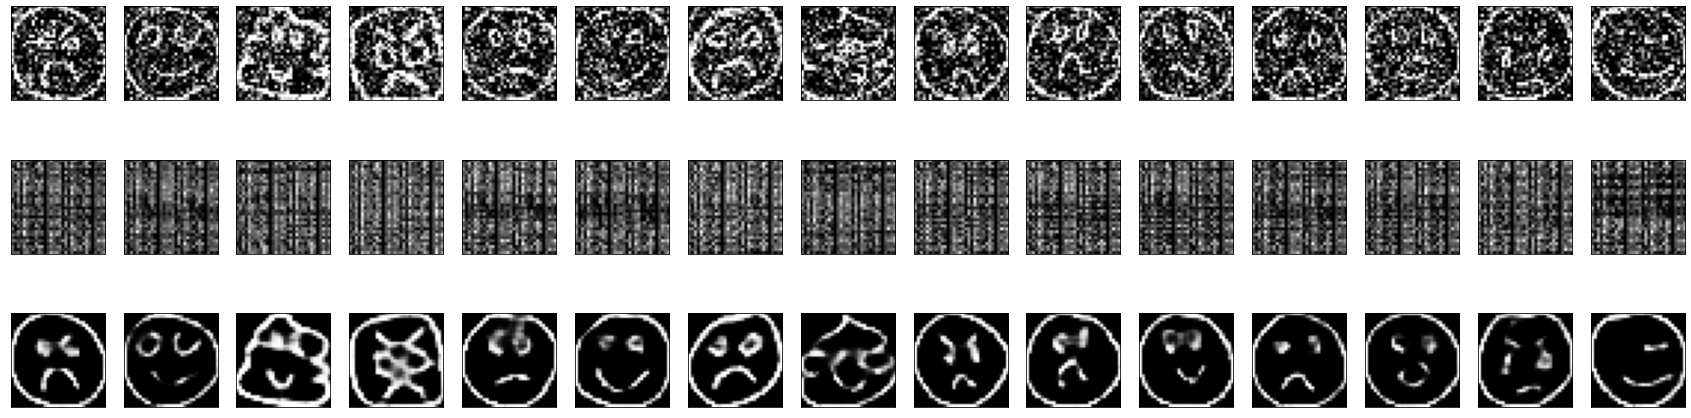

In [51]:
n = 15
appeared_emojis = []
plt.figure(figsize=(30, 8))
for i in range(n):

  # Display original
  ax = plt.subplot(3, n, i+1)
  plt.imshow(X_test_noisy[i].reshape(32, 32))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # Display encoded
  ax = plt.subplot(3, n, i+1+n)
  plt.imshow(encoded_imgs[i].reshape(32, 32))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # Display decoded
  ax = plt.subplot(3, n, i+1+2*n)
  plt.imshow(decoded_imgs[i].reshape(32, 32))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)


Evalúen el error cuadrático medio entre las imágenes de prueba y su correspodiente salida

In [54]:
mse = tf.keras.losses.MeanSquaredError()
print(f'El error cuadrático medio es: {mse(X_test_tmp, decoded_imgs).numpy()}')

El error cuadrático medio es: 0.04641535505652428


**¿El modelo es capaz de eliminar ruido en las imágenes de entrada?**

Cómo se puede observar, en primer lugar el error cuadrático medio es muy pequeño incluso es más pequeño que en los casos anteriores. Además si se puede notar que el autoencoder fue capaz de eliminar por completo el ruido que se había generado en las otras imágenes y no solo eso sino que también existe una buena aproximación entre las imágenes de entrada y las imágenes de salida, anque todavía existen algunos fallos en algunos emojis como los emojis de caquita o los emojis más complejos. Se puede concluir que una aplicación útil de este tipo de arquitectura de redes neuronales es la de eliminar el ruido de algunas imágenes, aunque claramente es necesario de una correcta elección de las capas para llegar a niveles como los observados para este conjunto de datos. 